In [93]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('air_data.csv')
explore = data.describe(percentiles=[], include='all').T
explore['null'] = len(data) - explore['count']
explore = explore[['null', 'max', 'min']]
explore.to_csv('explore.csv')

In [12]:
ffp = data['FFP_DATE'].apply(lambda x : datetime.strptime(x, '%Y/%m/%d'))
ffp_year = ffp.map(lambda x : x.year)

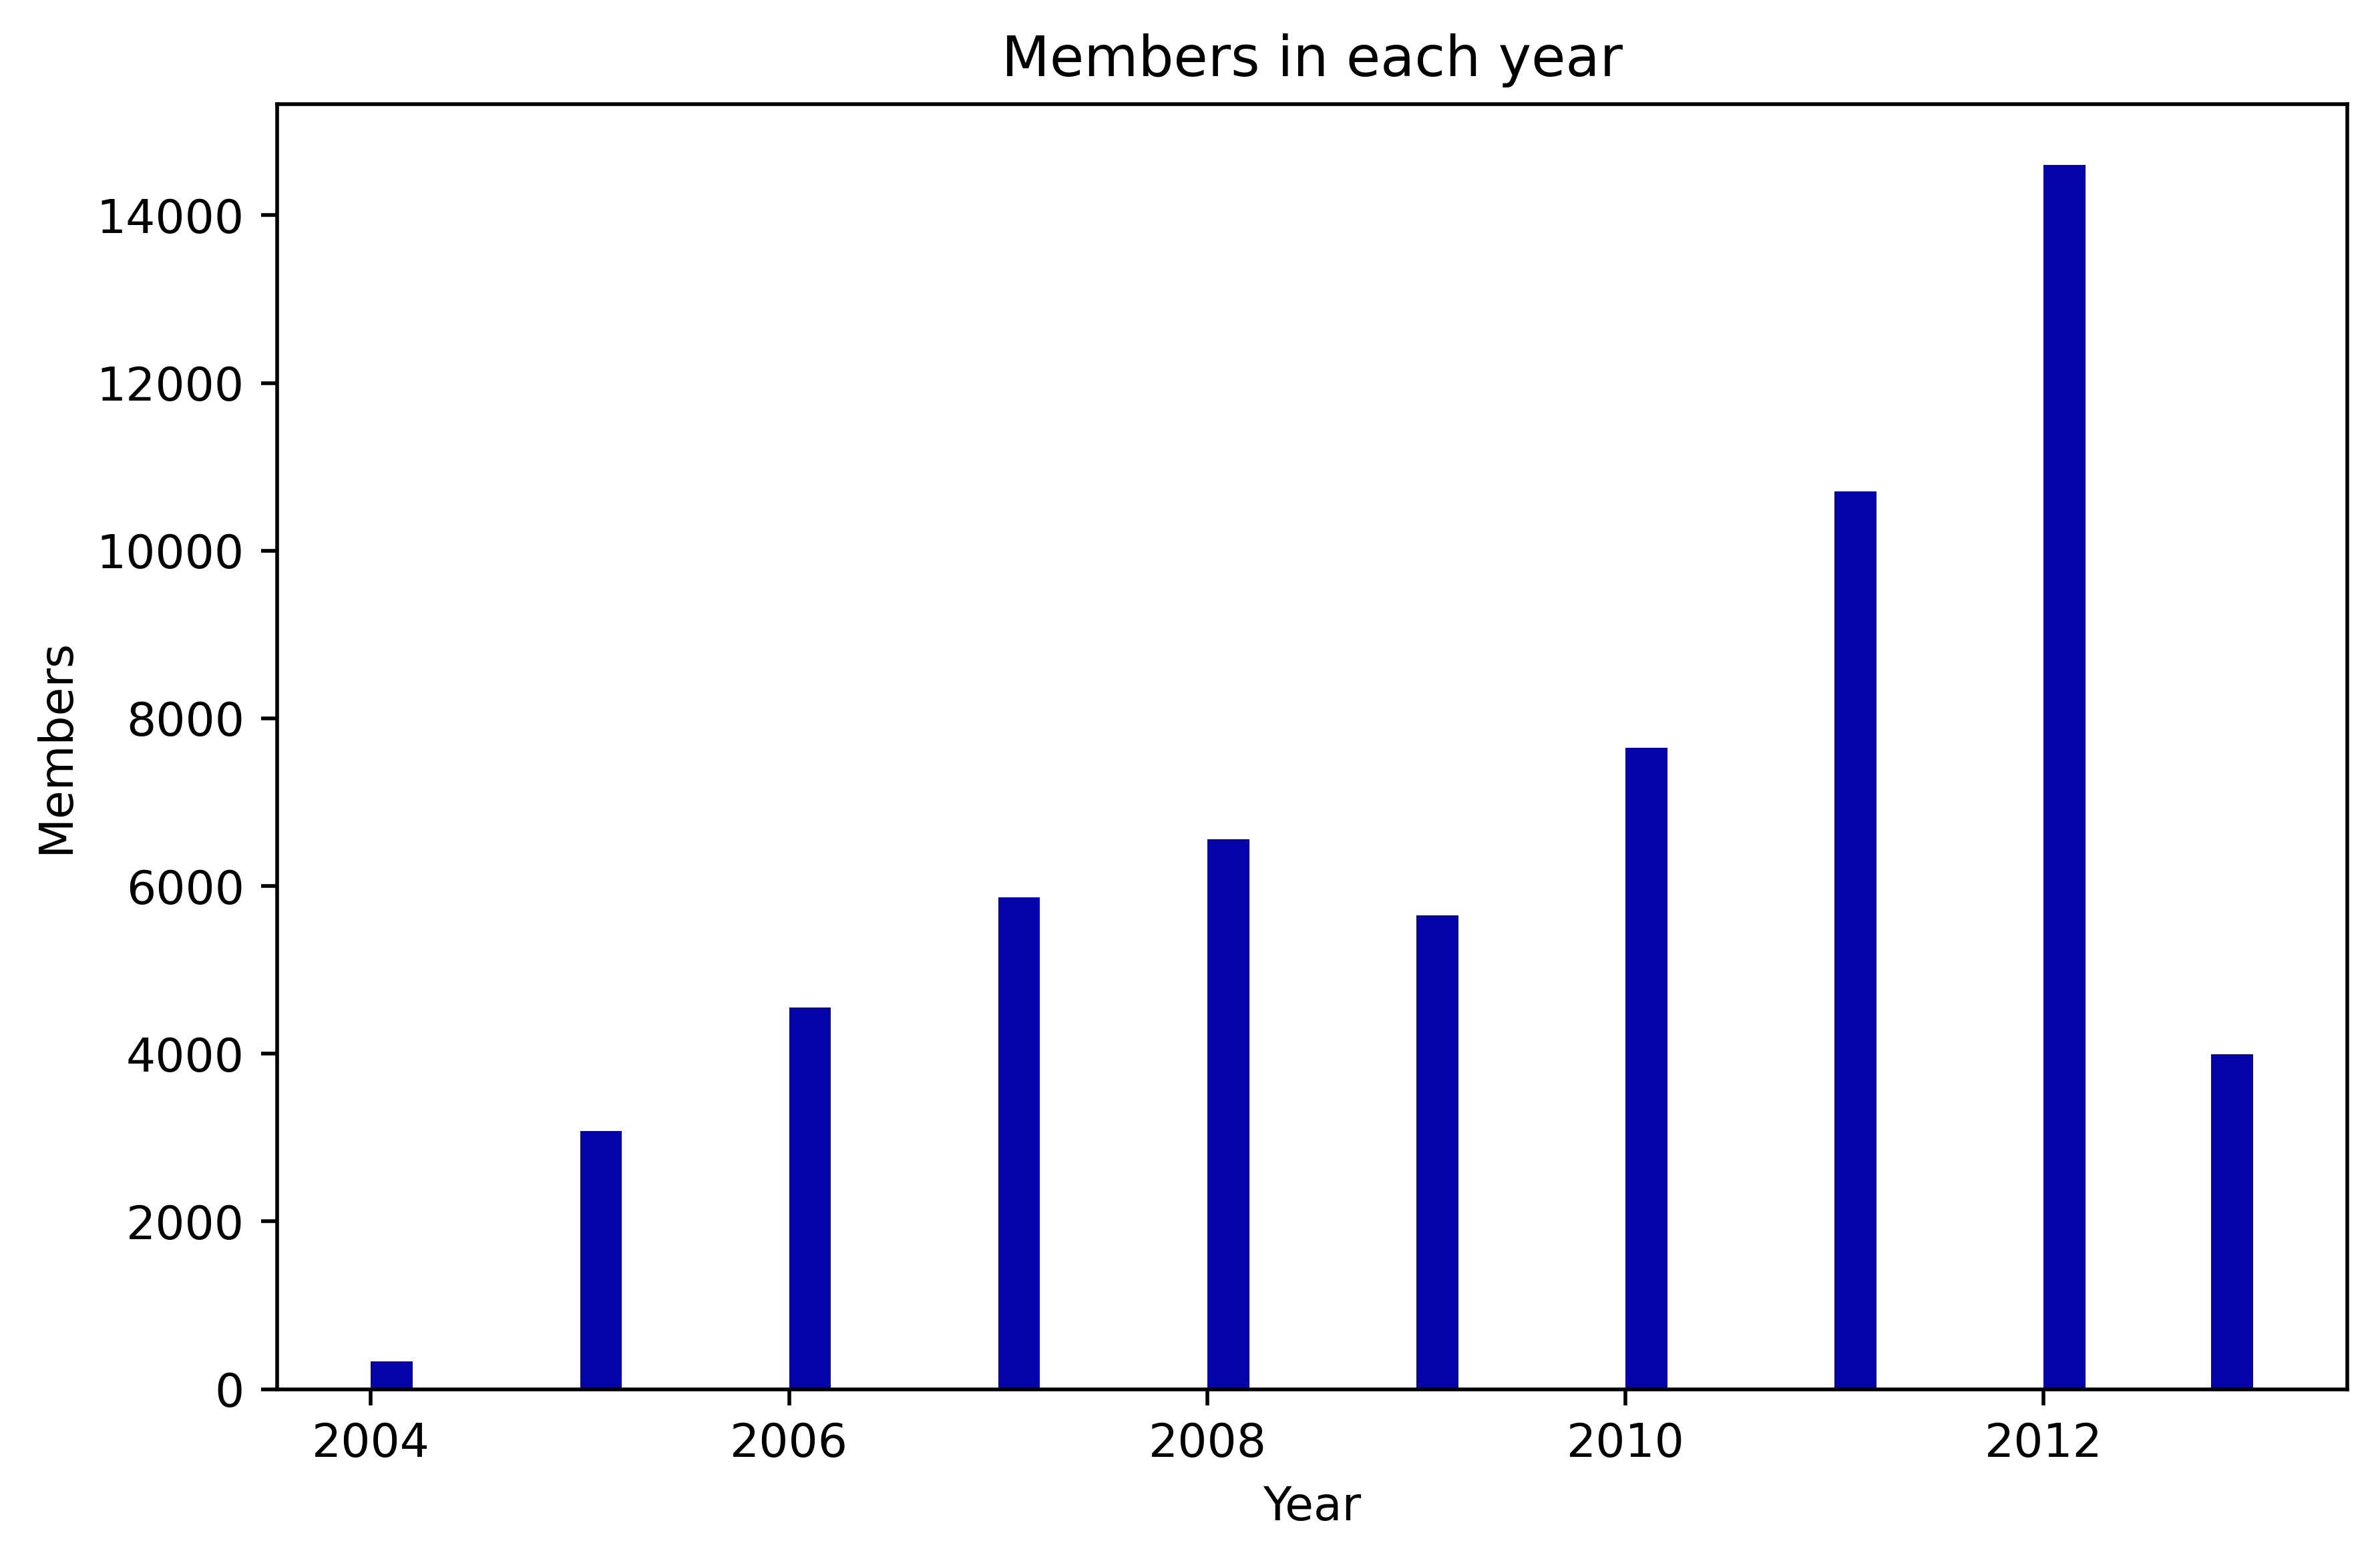

In [29]:
fig = plt.figure(figsize=(8, 5), dpi=500)
plt.hist(ffp_year, bins='auto', color='#0504aa')
plt.xlabel('Year')
plt.ylabel('Members')
plt.title('Members in each year')
plt.show()
fig.savefig('hist.png', dpi=500)

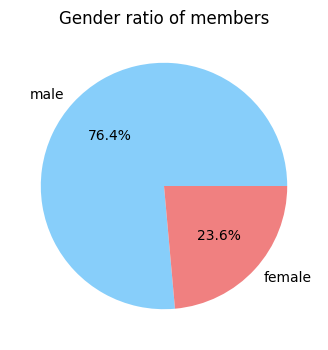

In [45]:
male = pd.value_counts(data['GENDER'])['男']
female = pd.value_counts(data['GENDER'])['女']
fig = plt.figure(figsize=(7, 4))
plt.pie([male, female], labels=['male', 'female'], colors=['lightskyblue', 'lightcoral'], autopct='%1.1f%%')
plt.title('Gender ratio of members')
plt.show()

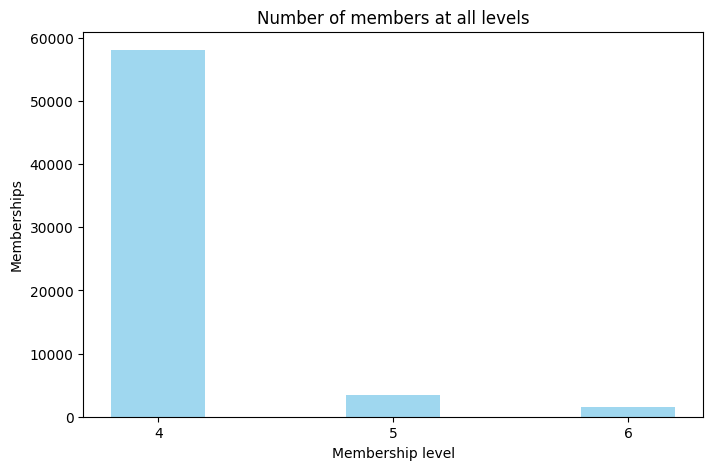

In [48]:
lv_four = pd.value_counts(data['FFP_TIER'])[4]
lv_five = pd.value_counts(data['FFP_TIER'])[5]
lv_six = pd.value_counts(data['FFP_TIER'])[6]
fig = plt.figure(figsize=(8, 5))
plt.bar(x=range(3), height=[lv_four, lv_five, lv_six], width=0.4, alpha=0.8, color='skyblue')
plt.xticks([index for index in range(3)], ['4', '5', '6'])
plt.xlabel('Membership level')
plt.ylabel('Memberships')
plt.title('Number of members at all levels')
plt.show()

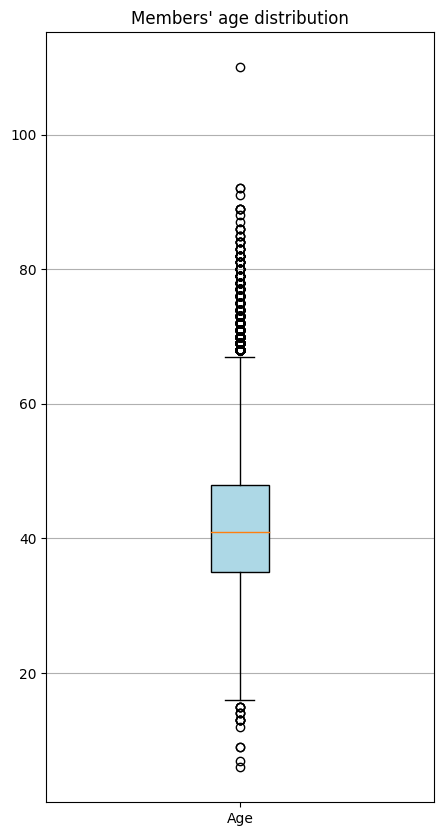

In [66]:
# 会员年龄分布箱形图
age = data['AGE'].dropna()
age = age.astype('int64')
fig = plt.figure(figsize=(5, 10))
plt.boxplot(age, patch_artist=True, labels=['Age'], boxprops={'facecolor':'lightblue'})
plt.title('Members\' age distribution')
plt.grid(axis='y')
plt.show()
fig.savefig('会员年龄分布箱形图', dpi=500)

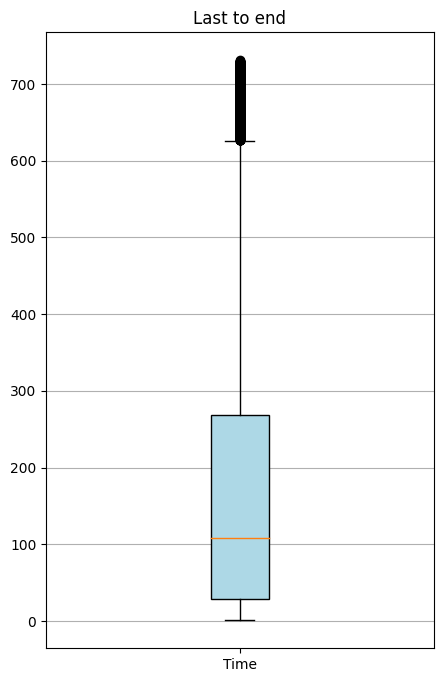

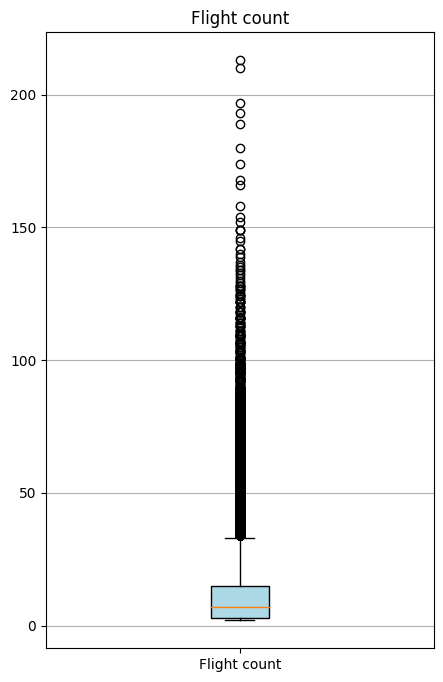

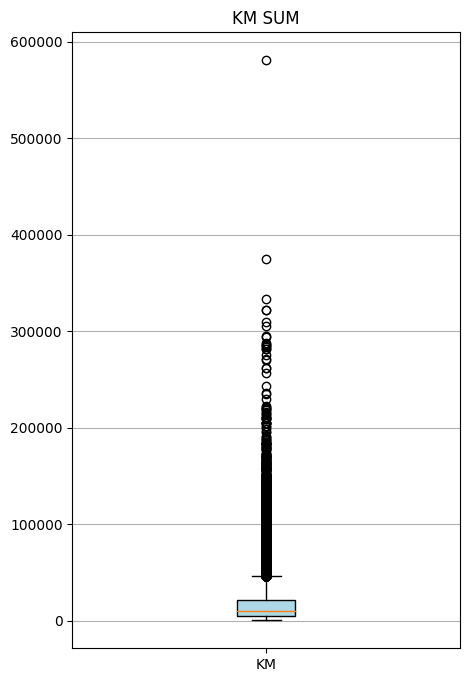

In [70]:
# 挖掘高价值客户
lte = data['LAST_TO_END']
fc = data['FLIGHT_COUNT']
sks = data['SEG_KM_SUM']
# 最后乘机至结束时长分布箱形图
fig = plt.figure(figsize=(5, 8))
plt.boxplot(lte, patch_artist=True, labels=['Time'], boxprops={'facecolor':'lightblue'})
plt.title('Last to end')
plt.grid(axis='y')
plt.show()
# 飞行次数分布箱形图
fig = plt.figure(figsize=(5, 8))
plt.boxplot(fc, patch_artist=True, labels=['Flight count'], boxprops={'facecolor':'lightblue'})
plt.title('Flight count')
plt.grid(axis='y')
plt.show()
# 总飞行公里数分布箱形图
fig = plt.figure(figsize=(5, 8))
plt.boxplot(sks, patch_artist=True, labels=['KM'], boxprops={'facecolor':'lightblue'})
plt.title('KM SUM')
plt.grid(axis='y')
plt.show()

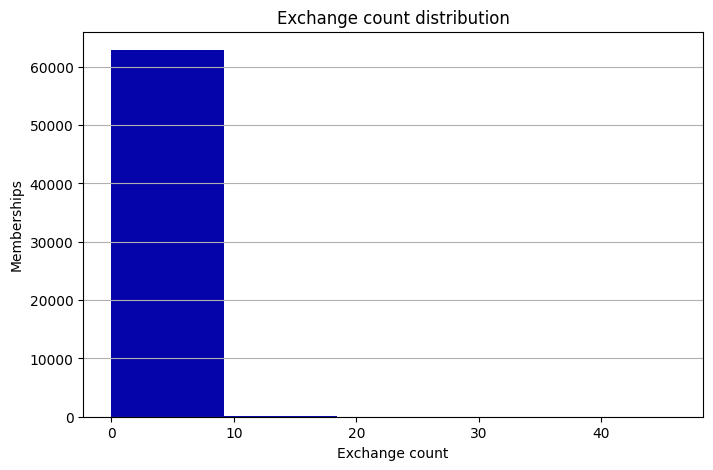

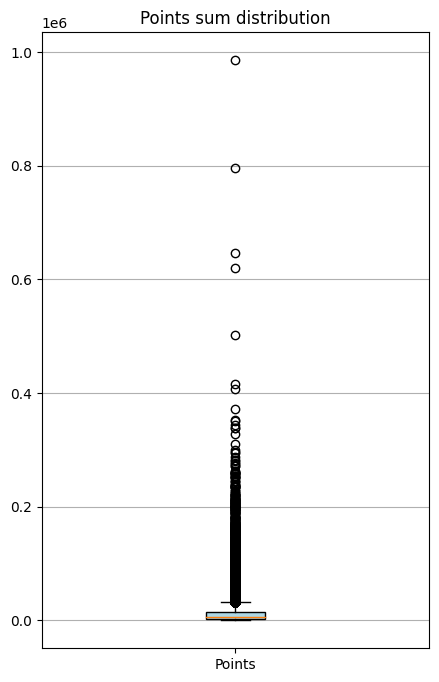

In [73]:
# 客户积分兑换次数直方图
ec = data['EXCHANGE_COUNT']
fig = plt.figure(figsize=(8, 5))
plt.hist(ec, bins=5, color='#0504aa')
plt.xlabel('Exchange count')
plt.ylabel('Memberships')
plt.title('Exchange count distribution')
plt.grid(axis='y')
plt.show()
# 总积分分布箱型图
ps = data['Points_Sum']
fig = plt.figure(figsize=(5, 8))
plt.boxplot(ps, patch_artist=True, labels=['Points'], boxprops={'facecolor':'lightblue'})
plt.title('Points sum distribution')
plt.grid(axis='y')
plt.show()

                FFP_TIER  FLIGHT_COUNT  LAST_TO_END  SEG_KM_SUM  \
FFP_TIER        1.000000      0.582447    -0.206313    0.522350   
FLIGHT_COUNT    0.582447      1.000000    -0.404999    0.850411   
LAST_TO_END    -0.206313     -0.404999     1.000000   -0.369509   
SEG_KM_SUM      0.522350      0.850411    -0.369509    1.000000   
EXCHANGE_COUNT  0.342355      0.502501    -0.169717    0.507819   
Points_Sum      0.559249      0.747092    -0.292027    0.853014   
AGE             0.076245      0.075309    -0.027654    0.087285   
ffp_year       -0.116510     -0.188181     0.117913   -0.171508   

                EXCHANGE_COUNT  Points_Sum       AGE  ffp_year  
FFP_TIER              0.342355    0.559249  0.076245 -0.116510  
FLIGHT_COUNT          0.502501    0.747092  0.075309 -0.188181  
LAST_TO_END          -0.169717   -0.292027 -0.027654  0.117913  
SEG_KM_SUM            0.507819    0.853014  0.087285 -0.171508  
EXCHANGE_COUNT        1.000000    0.578581  0.032760 -0.216610  
Points

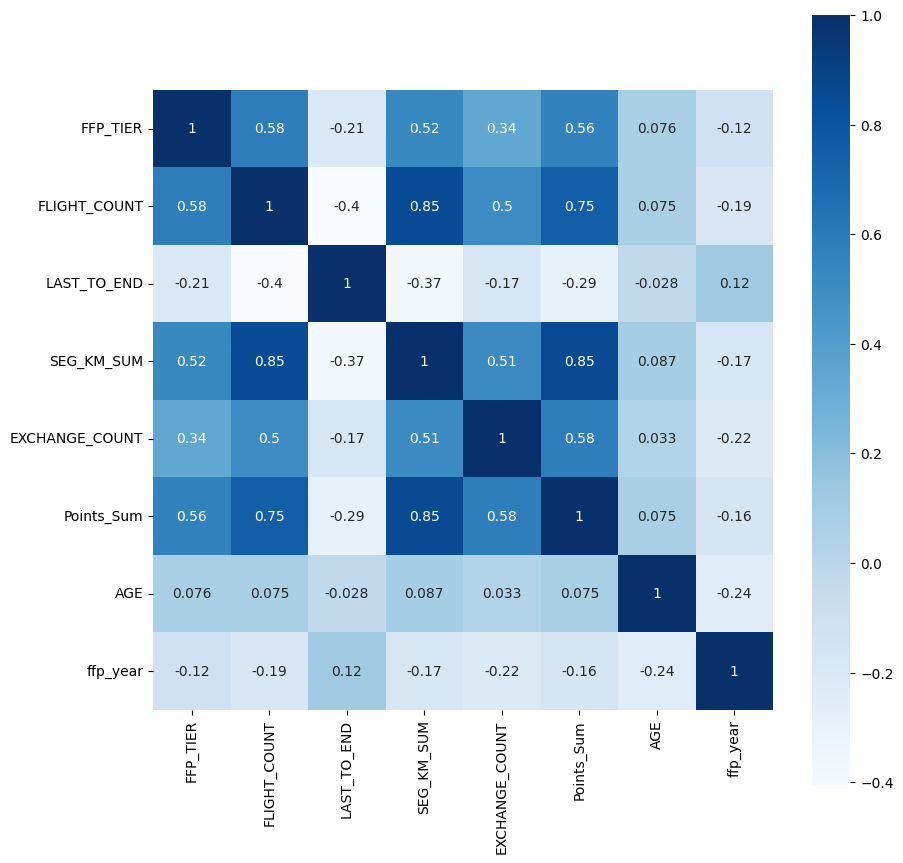

In [102]:
# 相关性分析
data_corr = data[['FFP_TIER', 'FLIGHT_COUNT', 'LAST_TO_END', 'SEG_KM_SUM', 'EXCHANGE_COUNT', 'Points_Sum']][:]
age1 = data['AGE'].fillna(0)
data_corr['AGE'] = age1.astype('int64')
data_corr['ffp_year'] = ffp_year
dt_corr = data_corr.corr('pearson')
print(dt_corr)
plt.subplots(figsize=(10, 10))
fig = sns.heatmap(dt_corr, annot=True, vmax=1, square=True, cmap='Blues')
plt.show()
fig.get_figure().savefig('相关性分析热力图', dpi=500)
